
# Project: Medical Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This project involves the descriptive analysis of medical appointment dataset in Brazil.
I'm only interested in finding out the associations of the patients who showed up for their
appointments and how they are different from patients who did not show up for appointments.
### Dataset Description 
> - PatientsID: Unique number that identifies each patients.
> - AppointmentID: Indicates the appointment number.
> - Gender: indicates if a patient is either a male or a female.
> - ScheduledDay: Tells on what date the patients set up their appointment.
> - AppointmentDay: Tells us what day the patient was ment to show up.
> - Age: Indicates patients age.
> - Neighbourhood: Hospitals location.
> - Scholarship: Tells us on what day the patient set up their appointment.
> - Sms_received: Indicates if a patient received sms for appointments reminder.
> - Hypertension, Diabetes, Alcoholism, Handicap: This could be patients reason for appointments.
- **Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. Which I will replace with 0 and 1 respectively.**

### Question(s) for Analysis
>- **1. Did more people show up for appointments if the appointment date was same as scheduled date?**
>- **2. Does the gender of a patient determines if he/her shows up or not ?**
>-  **3. What is the relationship between showing up and age**


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

### Import Libraries

> Import all Libraries needed for this project

In [1]:
#   Import libraries i plan to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### Dropping error records 
> clearly we can see from above, the minimum age is -1 which is an error and we need to drop such record


<a id='wrangling'></a>
# Data Wrangling
## Accessing

**Under this section, i will be performing data wrangling processes. There will be no need for data gathering beccause the data was already provided. Some process includes:**
- Loading and Opening the data.
- Data Assessment to identify any problems in data quality or structure.
- Data cleaning to ensure the data is at high quality.

In [2]:
# Load data 

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### creating user-defined functions for data visualizations
I created 2 functions for visualizing, using barchart and piechart.

In [3]:
#creatin functions for plotting bar chart and pie chart.

def PlotBars(label1, height1, label2, height2, col1='b', col2='r', Title='Title', yLabel='Number of patients', xLabel=''):
    sns.set()
    fig, ax = plt.subplots()
    ax.bar(label1, height1, label=label1, color=col1)
    ax.bar(label2, height2, label=label2, color=col2)
    ax.set_title(Title, fontweight='bold')
    ax.set_ylabel(yLabel)
    ax.set_xlabel(xLabel)
    ax.legend()
    
    
    
def pieplot(column, Labels, Title):
    sns.set()
    fig = plt.figure(figsize =(10, 7))
    plt.pie(column.values, labels=Labels, colors=['b', 'r'], autopct='%.0f%%', textprops={'color':"w"})
    plt.legend()
    plt.title(Title)
    plt.show()

In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- No missing data
- The data type of ScheduledDay and AppointmentDay needs to be a datetime.
- All columns name are in upper and lower characters
- Will need to rename No-show to No_show


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- clearly we can see from above, the minimum age is -1 which is an error and we need to drop such record
- The handicap column has value 0 to 4 which is an error. It should only have a value of 0 & 1


## Data Cleaning
**Here we will be cleaning up our data to make it useable for exploratory analysis**

#### Data cleaning processes
1. To keep consistency, We have to convert all the column names to lower case and also rename the 'No-show' column to 'no_show' by using replace function.
2. Find the index number where age= -1 then dropped the row from the table.
3. Changed the datatype of both scheduledday & appointmentday to datetime.
4. Replace values > 1 with 1 in handicap column.
5. Drop all column that will not be needed for this analysis.
6. Create a new column and add to our dataset. this will show how many days a patient waits to the appointment day.
7. Drop rows where the Appointment day is behinde the scheduled day.
8. Re-arrange the dataset


In [7]:
#1. Convert column names to lower-case and replace '-' to '_'

df.rename(columns = lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [8]:
#2. Drop record where age = -1

df.query('age < 0')

df.drop([99832], inplace=True)

In [9]:
# check if row was dropped 

df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [10]:
#3. Change the datatype of scheduled day & appointmentday from object to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [11]:
# View values in column handicap

df['handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [12]:
#4. Cleaning the handicap column. Make Values > 1 to be = 1

df.loc[df['handcap'] > 1, 'handcap'] = 1
df['handcap'].value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

> We will be dropping off columns that will not be needed in this analysis. 


In [13]:
#5. Drop column

df.drop(['appointmentid','patientid', 'neighbourhood'], axis=1, inplace=True)

> create new column "days_waiting" to show how many days a patience has to wait to it's appointment date after scheduled date.
 And we also need to convert the 'days_column' datatype to an integer in order to make use of it.

In [14]:
#6. create new column
#df['days_waiting'] = df['appointmentday'].sub(df['scheduledday'], axis=0).dt.days

df['days_waiting'] = df['appointmentday'].dt.date -df['scheduledday'].dt.date

# convert datatype to int

df['days_waiting'] = df['days_waiting'].dt.days



df.head(2)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_waiting
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No,0


In [15]:
#7. Drop rows ['days=waiting'] <= -1

Del = df[df['days_waiting'] <= -1].index
df.drop(Del, inplace = True)

In [16]:
# Check if deleted

df[df['days_waiting'] <= -1]

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_waiting


In [17]:
#8. rearranging the DataFrame

df = df[['scheduledday', 'appointmentday', 'days_waiting', 'gender', 'age', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received','no_show']]


In [18]:
df.head(1)

,scheduledday,appointmentday,days_waiting,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,F,62,0,1,0,0,0,0,No


In order to make no_show column useable in statistics calculations we need to make it an integer data type.

In [19]:
# make 'Yes'=1 and 'No'=0

df['no_show'] = df['no_show'].apply(lambda val: 0 if val == 'No' else 1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   scheduledday    110521 non-null  datetime64[ns, UTC]
 1   appointmentday  110521 non-null  datetime64[ns, UTC]
 2   days_waiting    110521 non-null  int64              
 3   gender          110521 non-null  object             
 4   age             110521 non-null  int64              
 5   scholarship     110521 non-null  int64              
 6   hipertension    110521 non-null  int64              
 7   diabetes        110521 non-null  int64              
 8   alcoholism      110521 non-null  int64              
 9   handcap         110521 non-null  int64              
 10  sms_received    110521 non-null  int64              
 11  no_show         110521 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(9), object(1)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis
> **In this section, the aim is to finding patterns and visualizing the relationships of the hospital patients who showed up or didn't show up for their appointments. The analysis carried out in this section will address the research question posed in the introductory section.**



### 1. Did more people show up for appointments if the appointment date was same as scheduled date?


> First thing I will like to see is the ovreally distribution of the patients in the no_show column. With that information, I can have an understanding of the trajectory of the dataset.
Looking at the overall percentage of patients that showed up VS those that didn't show up

In [21]:
# value count of patients

No_Show = df['no_show'].value_counts()
No_Show

0    88207
1    22314
Name: no_show, dtype: int64

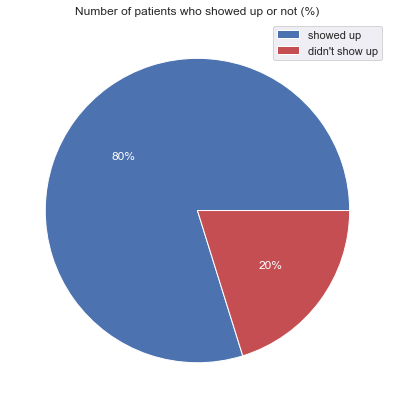

In [22]:
# A pie plot of patients who showed up vs didn't show up

pieplot(column = No_Show, Labels = ['showed up', "didn't show up"], Title= "Number of patients who showed up or not (%)")

- 80 percent of patients showed up for their appointment, while 20 percent ddn't show up.




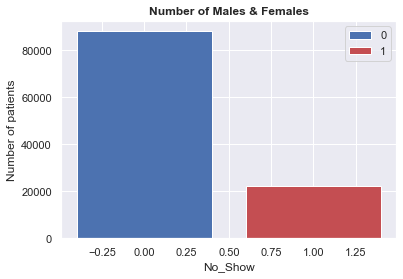

In [23]:
# Plotting bar chart

PlotBars(label1=No_Show.index[0], height1=No_Show.values[0], label2=No_Show.index[1], height2=No_Show.values[1],
        Title='Number of Males & Females', xLabel='No_Show')

Over 80,000 hospital patients showed up for their appointment, while about 21,000 didn't show up.



#### Analysis on days waiting

> now lets create a separate tables of those who showed up and those who didn't show up. Then carry out our analysis on them.

In [24]:
# Create table showed_up and no_show_up

showed_up = df[df['no_show'] == 0]
not_show_up = df[df['no_show'] == 1]

I created 2 different tables for patients who showed up and those who didn't. I will be using these tables to look at the differences between both patients

>

Text(0.5, 1.0, 'Relation between Days_Waited & Showed_Up')

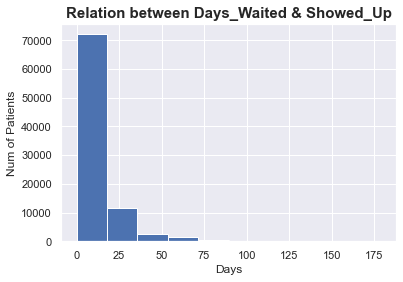

In [25]:
# plot show_up in relation to waited_days

showed_up['days_waiting'].plot(kind='hist');

plt.ylabel('Num of Patients')
plt.xlabel('Days')
plt.title('Relation between Days_Waited & Showed_Up', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Relation between Days_Waited & Not_Showed_Up')

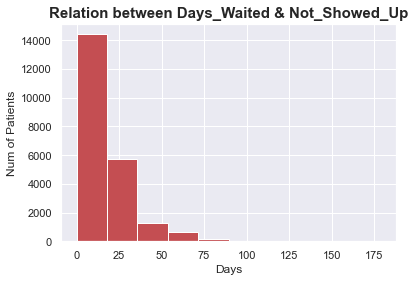

In [26]:
# plot not_show_up in relation to waited_days

not_show_up['days_waiting'].plot(kind='hist', color='r', alpha=1);

plt.ylabel('Num of Patients')
plt.xlabel('Days')
plt.title('Relation between Days_Waited & Not_Showed_Up', fontsize=15, fontweight='bold')

- Most patients whose appointments was between 0-25 days showed up for their appointments. But the same can be said about those who didn't show up too. 
The visual above has not clearly differentiated between both data, but we can see the longer it takes, the most likely the patient will not show up. its best I look more closely at how this data was distributed between 0-25 days.

Text(0.5, 1.0, 'Relation between Days_Waited & Showed_Up(0-25)')

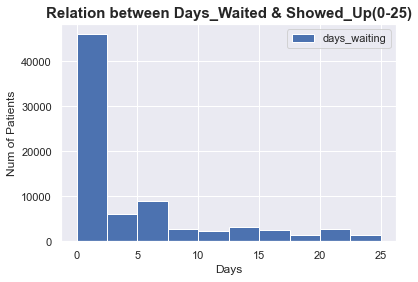

In [27]:
# plot showed_up between 0-25 waited_days

showed_up[showed_up['days_waiting']<=25].plot(kind='hist', y='days_waiting');

plt.ylabel('Num of Patients')
plt.xlabel('Days')
plt.title('Relation between Days_Waited & Showed_Up(0-25)', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Relation between Days_Waited & Not_Showed_Up(0-25)')

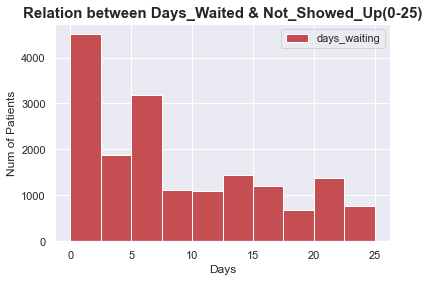

In [28]:
# View not_show_up between 0-25 days

not_show_up[not_show_up['days_waiting']<=25].plot(kind='hist', y='days_waiting', color='r', alpha=1);

plt.ylabel('Num of Patients')
plt.xlabel('Days')
plt.title('Relation between Days_Waited & Not_Showed_Up(0-25)', fontsize=15, fontweight='bold')

- Now we can clearly see that most patients showed up because their scheduled date & appointment date was between 24hours. The longer the appointment date, the less likely patients will show up.
- While for those who didn't show up, the graph shows over 4000 of them whose scheduled date and appointment date was between 0 & 1 days failed to show up too. But this numbers are low when you Compare that to over 40000 that showed up having the same time constraints. 
- But we can also see a constant distribution from day 5-25. It means there could be a different reason to why patients disn't show up. Which leads me to my second question:

### 2. Does the gender of a patient determines if he/her shows up or not ?
 I will be looking at how the male and females patients reacted to the no_show column

In [29]:
# gender value_counts

Gender=df['gender'].value_counts()
Gender

F    71836
M    38685
Name: gender, dtype: int64

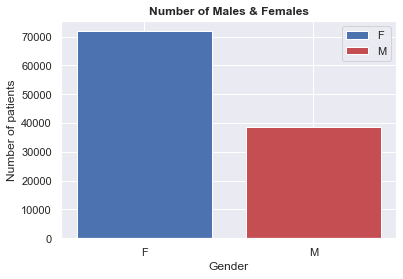

In [30]:
# used plotbars function.

PlotBars(label1=Gender.index[0], height1=Gender.values[0], label2=Gender.index[1], height2=Gender.values[1],
        Title='Number of Males & Females', xLabel='Gender')

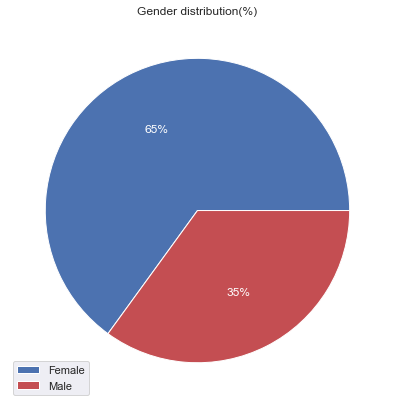

In [31]:
# used pieplot function

pieplot(column = Gender, Labels=['Female','Male'], Title='Gender distribution(%)')

From the above analysis there 65% Female and 35% Male.
We have more Female patients than Male patients. The number of Female patients is almos twice the number of Male patients.

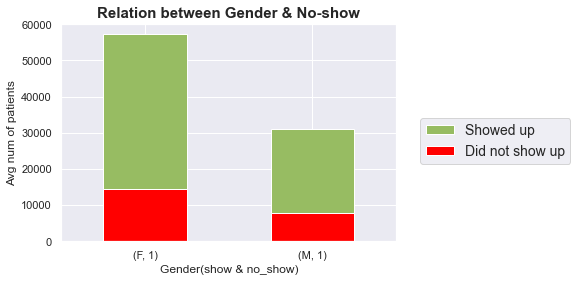

In [32]:
# plotting gender and no_show

showed_up.groupby(['gender', 'no_show'])['no_show'].count().plot(kind='bar', color='#97BC62FF'),
not_show_up.groupby(['gender', 'no_show'])['no_show'].count().plot(kind='bar', color='Red')
plt.ylabel('Avg num of patients')
plt.xlabel('Gender(show & no_show)')
plt.title('Relation between Gender & No-show', fontsize=15, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(labels=['Showed up', 'Did not show up'], fontsize=14, bbox_to_anchor=(1.05, 0.6))

 More Females showed up than Males and also, more Females didn't show up tha Males.
 This could be as a resulT of the high female population.
 
 
 
 

### 3. What is the relationship between showing up and age

Here I will be creating age based on 4 different age groups **0-12, 13-18, 19-59 And 59+** This will better help us in understanding which age groups reacted positively and negatively to no_show column.

> Here i will create a new column "age_stage" to help group and identify age in their corresponding range.

In [33]:
# create a variable for maximum age

max_age=df['age'].max()

In [34]:
# create age range and inserting it into the DataFrame df

labels = ['0:12', '13:18', '19:59', '59+']
bins = [0, 12, 18, 59, max_age]

age_stage = pd.cut(df['age'], bins=bins, labels=labels)
df.insert(9, 'age_stage', age_stage)

In [35]:
df.head()

,scheduledday,appointmentday,days_waiting,gender,age,scholarship,hipertension,diabetes,alcoholism,age_stage,handcap,sms_received,no_show
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,F,62,0,1,0,0,59+,0,0,0
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,M,56,0,0,0,0,19:59,0,0,0
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,F,62,0,0,0,0,59+,0,0,0
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,F,8,0,0,0,0,0:12,0,0,0
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,F,56,0,1,1,0,19:59,0,0,0


Text(0, 0.5, 'Number of patients')

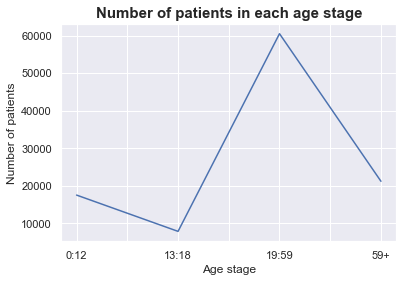

In [36]:
# Plot the graph for age range distribution

df.groupby('age_stage')['no_show'].count().plot();


plt.title('Number of patients in each age stage', fontsize=15, fontweight='bold');
plt.xlabel('Age stage', fontsize=12);
plt.ylabel('Number of patients', fontsize=12)

From our datat, the highest numbers of patients are between age 19-59 (Adults) and its lowest are from age 13-18. 

> Now, I will be looking at how the age_stages is associated with no_show.


Vefore we proceed, i will first start by updating both tables we created earlier "showed_up" and "not_show_up" table.

In [37]:
# update tables "showed_up" & "not_show_up"

showed_up = df[df['no_show'] == 0]
not_show_up = df[df['no_show'] == 1]

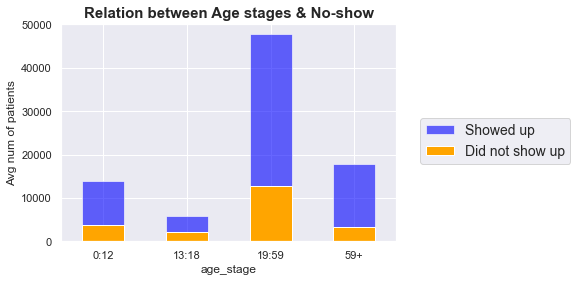

In [38]:
# plot patients age_stages against no_show

showed_up.groupby('age_stage')['no_show'].count().plot(kind='bar', color='blue', alpha=0.6),
not_show_up.groupby('age_stage')['no_show'].count().plot(kind='bar', color='orange')
plt.ylabel('Avg num of patients')
plt.title('Relation between Age stages & No-show', fontsize=15, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(labels=['Showed up', 'Did not show up'], fontsize=14, bbox_to_anchor=(1.05, 0.6))

This shows the numbers of patients that either showed up or not based on their different age_stages.
-  More people in Age stage 0-12, 19-59 and 59+ showed up compared to age 13-18

<a id='conclusions'></a>
## Conclusions
> **The number of waiting days** had little effect on showing up to appointments. But with the higher number of days increased the chances of not showing up. 

> Most patients who showed up for their appointments had their appointment date scheduled between 0 to 1 day.
> - This means that the many of the people who showed up didn't have to wait for long for their appointment.
> - The more the waiting days to an appointment, the higher the chances of not showing up.


> **Gender has no effect on showed up or not** 
The number of females is almost twice that of males. This only made the analysis result more biased.


> **The Age of the patients** Showed that there were high number of adult patients between ages 19-59.
>- Those from Age stage 0-12, 19-59 and 59+ showed up more for their appointments.
>- The patients between age 13-18 has a balance between those tha showed up and didnt show up.

### Limitation

> **Higher number of females than male**
>- The number of female patient is almost twice the number of males, this will make the analysis one to be biased.

